In [ ]:
#Creating network
from lab6 import prepare_visual_genome_text, train_embeddings
from lab2 import process_text_network, visualize_network

zip_url = "https://homes.cs.washington.edu/~ranjay/visualgenome/data/dataset/region_descriptions.json.zip"
text_file = prepare_visual_genome_text(zip_url)

print(f"\n✓ Text data ready: {text_file}")
print("\n" + "="*80)
print("BUILDING TEXT NETWORK")
print("="*80)

network_data = process_text_network(
    text_file,
    rare_threshold=0.00025,  # Keep only very common tokens
    verbose=True
)

print(f"\n✓ Network built: {network_data['graph'].number_of_nodes():,} nodes, "
      f"{network_data['graph'].number_of_edges():,} edges")

/Users/voodoo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


File vg_text.txt already exists. Skipping processing.

✓ Text data ready: vg_text.txt

BUILDING TEXT NETWORK
Loaded text: 154198751 characters
Tokenized: 33662592 tokens
Sample tokens: ['eyelgass', 'cort', 'bustamante', 'headwear', 'au', 'masonary', 'schmitz', 'crewcut', 'samsungs', 'shimmery', 'facts', 'bote', 'snot', 'talma', 'mavic', 'performance', 'baros', 'whinter', 'bratz', 'bails']
Replaced 62215 rare tokens (threshold=0.00015)
Final vocabulary: 650 unique tokens
Sample tokens: ['grey', 'plants', 'bottom', 'river', 'ball', 'chocolate', 'bushes', 'sky', 'plane', 'jacket', 'pillows', 'dirt', 'airport', 'orange', 'coat', 'umpire', 'horns', 't', 'finger', 'one']
Graph: 650 nodes, 81320 edges
Top tokens by frequency:
   1. '.' (freq=6085975)
   2. '<RARE>' (freq=3386382)
   3. 'a' (freq=2220903)
   4. 'the' (freq=2155082)
   5. 'on' (freq=1396037)
   6. 'of' (freq=980462)
   7. 'is' (freq=787909)
   8. 'in' (freq=714867)
   9. 'white' (freq=652421)
  10. 'black' (freq=398632)
  11. '

In [2]:
# NOTE Occurrences per word in network
# Display frequency of all words in the network, sorted by frequency

token_counts = network_data['token_counts']
nodes = network_data['nodes']

print("=" * 80)
print("WORD FREQUENCIES IN NETWORK")
print("=" * 80)
print(f"Total unique words: {len(nodes)}")
print(f"Total token occurrences: {sum(token_counts.values()):,}")
print()

# Sort by frequency (descending)
sorted_words = sorted(token_counts.items(), key=lambda x: -x[1])

# Print all words with their frequencies
print(f"{'Rank':<6} {'Word':<20} {'Frequency':>12} {'% of Total':>10}")
print("-" * 50)

total = sum(token_counts.values())
for rank, (word, freq) in enumerate(sorted_words, 1):
    pct = (freq / total) * 100
    print(f"{rank:<6} {word:<20} {freq:>12,} {pct:>9.2f}%")

print()
print("=" * 80)
print(f"Summary: {len(nodes)} words, {sum(token_counts.values()):,} total occurrences")

WORD FREQUENCIES IN NETWORK
Total unique words: 650
Total token occurrences: 33,662,592

Rank   Word                    Frequency % of Total
--------------------------------------------------
1      .                       6,085,975     18.08%
2      <RARE>                  3,386,382     10.06%
3      a                       2,220,903      6.60%
4      the                     2,155,082      6.40%
5      on                      1,396,037      4.15%
6      of                        980,462      2.91%
7      is                        787,909      2.34%
8      in                        714,867      2.12%
9      white                     652,421      1.94%
10     black                     398,632      1.18%
11     and                       341,934      1.02%
12     man                       317,885      0.94%
13     with                      292,771      0.87%
14     blue                      283,594      0.84%
15     red                       237,296      0.70%
16     green                

In [ ]:
#Edges per word
print("=" * 80)
print("EDGES PER NODE (DEGREE)")
print("=" * 80)

graph = network_data['graph']

# Get degree for each node
degrees = dict(graph.degree())

# Sort by degree (descending)
sorted_degrees = sorted(degrees.items(), key=lambda x: -x[1])

print(f"Total nodes: {graph.number_of_nodes()}")
print(f"Total edges: {graph.number_of_edges()}")
print(f"Average degree: {sum(degrees.values()) / len(degrees):.2f}")
print()

print(f"{'Rank':<6} {'Word':<20} {'Degree':>10} {'% of Max':>10}")
print("-" * 50)

max_degree = sorted_degrees[0][1] if sorted_degrees else 1
for rank, (word, degree) in enumerate(sorted_degrees, 1):
    pct = (degree / max_degree) * 100
    print(f"{rank:<6} {word:<20} {degree:>10} {pct:>9.1f}%")

print()
print("=" * 80)
print(f"Degree range: {min(degrees.values())} - {max(degrees.values())}")


EDGES PER NODE (DEGREE)
Total nodes: 650
Total edges: 81320
Average degree: 250.22

Rank   Word                     Degree   % of Max
--------------------------------------------------
1      .                           649     100.0%
2      <RARE>                      649     100.0%
3      the                         648      99.8%
4      on                          647      99.7%
5      in                          647      99.7%
6      of                          645      99.4%
7      is                          645      99.4%
8      a                           644      99.2%
9      with                        643      99.1%
10     white                       642      98.9%
11     and                         642      98.9%
12     to                          640      98.6%
13     ,                           635      97.8%
14     black                       633      97.5%
15     over                        623      96.0%
16     red                         621      95.7%
17     are     

In [4]:
# NOTE frequencies of the missing CIFAR100 words
# Check which CIFAR-100 words are NOT in the VG network and show their frequencies

import torchvision
from collections import Counter

# Get CIFAR-100 class names
cifar100 = torchvision.datasets.CIFAR100(root='./data', download=True)
cifar_words = set(cifar100.classes)

# Get words in the network
network_vocab = set(network_data['nodes'])

# Find missing CIFAR-100 words
missing_words = sorted(cifar_words - network_vocab)
found_words = sorted(cifar_words & network_vocab)

print("=" * 80)
print("CIFAR-100 COVERAGE IN VG NETWORK")
print("=" * 80)
print(f"CIFAR-100 words: {len(cifar_words)}")
print(f"Found in network: {len(found_words)}")
print(f"Missing from network: {len(missing_words)}")
print()

# Count frequencies of ALL tokens (including rare ones that were filtered)
# We need to use original_tokens to get counts of words that were replaced with <RARE>
original_tokens = network_data['original_tokens']
all_token_counts = Counter(original_tokens)

print(f"{'Word':<20} {'Frequency':>12} {'Status':>15}")
print("-" * 50)

for word in missing_words:
    freq = all_token_counts.get(word, 0)
    # Check if compound word might exist with space instead of underscore
    alt_word = word.replace('_', ' ')
    alt_freq = all_token_counts.get(alt_word, 0) if '_' in word else 0
    
    if freq > 0:
        print(f"{word:<20} {freq:>12,} (too rare)")
    elif alt_freq > 0:
        status = f'(as "{alt_word}")'
        print(f"{word:<20} {alt_freq:>12,} {status}")
    else:
        print(f"{word:<20} {'0':>12} (not found)")

print()
print("=" * 80)
print(f"Summary: {len(missing_words)} CIFAR-100 words missing from network")
print(f"These words need synthetic descriptions to be added.")

CIFAR-100 COVERAGE IN VG NETWORK
CIFAR-100 words: 100
Found in network: 33
Missing from network: 67

Word                    Frequency          Status
--------------------------------------------------
aquarium_fish                   0 (not found)
beaver                         43 (too rare)
bee                            76 (too rare)
beetle                         71 (too rare)
butterfly                     737 (too rare)
camel                         186 (too rare)
castle                        750 (too rare)
caterpillar                    29 (too rare)
cattle                        841 (too rare)
chimpanzee                     13 (too rare)
cockroach                      10 (too rare)
crab                          191 (too rare)
crocodile                      45 (too rare)
dinosaur                      251 (too rare)
dolphin                       144 (too rare)
flatfish                        0 (not found)
forest                      4,002 (too rare)
fox                           1

## How We'll Train Our Network Embeddings

Now that you've seen the complete code, let's review the big picture. We're using PyTorch, a deep learning framework, to build and train our model. The whole process fits together like this:

```
📦 Dataset  →  🔄 DataLoader  →  🧠 Model  →  📈 Training Loop
```

The two key classes you just saw, **`SkipGramDataset`** and **`SkipGramModel`**, handle all the core logic for this.

-----

## The Big Picture: From Graphs to Embeddings

In a standard Skip-Gram model, the "context" is just the words nearby in a sentence. Our model is more advanced: **our context comes from the network graph.**

  * **Center Word:** A node in the graph (e.g., `"dog"`)
  * **Context Word:** A node connected by an edge (e.g., `"runs"`)

The training process (which you'll run next) follows this flow:

```
Network Data (word graph)
    ↓
SkipGramDataset
    • Takes word pairs from graph: (center, context_neighbor)
    • Samples negative examples (random words NOT in context)
    • Returns: (center, context, [neg₁, neg₂, ..., negₖ])
    ↓
DataLoader (batches data using WeightedRandomSampler)
    ↓
SkipGramModel
    • Embeddings: center words → vectors
    • Embeddings: context words → vectors
    • Compute similarity scores
    • Loss: maximize score for real neighbors, minimize for negatives
    ↓
Backpropagation (update embeddings)
    ↓
Repeat until convergence
```

-----

## Key Features in the Code

The code you just saw has three key features. Here’s *why* they are so important.

### 1\. Why Negative Sampling?

**Problem:** Our vocabulary has thousands of words. For the center word `"dog"`, calculating the probability for *every other word* (e.g., "cat", "runs", "airplane", "purple"...) to be its context is extremely slow.

**Solution:** We change the problem. Instead of "predict the context word," we ask a simpler, binary question:

  * ✅ **Positive Example:** Is `"runs"` (a real neighbor) in the context of `"dog"`? → **Train to output YES (score ≈ 1)**
  * ❌ **Negative Example:** Is `"airplane"` (a random word) in the context of `"dog"`? → **Train to output NO (score ≈ 0)**
  * ❌ **Negative Example:** Is `"purple"` (a random word) in the context of `"dog"`? → **Train to output NO (score ≈ 0)**

This is **Negative Sampling**. By training the model to distinguish between 1 positive example and \~15 negative ones (`num_negative=15`), we get a massive speedup and still learn high-quality embeddings.

### 2\. Why Weighted Sampling?

**Problem:** Not all neighbors are equally important. A pair like `("man", "walking")` might be very common and meaningful, while `("man", "street")` is also common but maybe less specific.

**Solution:** We use `WeightedRandomSampler` in the `train_embeddings` function. This sampler uses the **weights** from our `SkipGramDataset`, which are based on the `distance_matrix` (co-occurrence frequency).

This forces the training loop to **pay more attention to strong, frequent pairs**, sampling them more often and learning their relationship better.

### 3\. Why Filter Punctuation?

**Problem:** You saw the `filter_punctuation_from_network` function. Why bother?

**Solution: Hub Poisoning.** Think about the word `"."` (a period). It's a "neighbor" to the last word of *every single sentence*. This makes it a massive, meaningless "hub" that connects thousands of unrelated words.

If we left punctuation in, the model would waste most of its effort learning that "everything is related to a period." By removing it, we force the model to learn *actual semantic relationships* between words.

-----

## What's Next?

Now that you understand the "what" and the "why," it's time to put it all together. In the following cells, you will:

1.  **Load** the text data and **build** the network.
2.  **Run** the `train_embeddings` function to train your model.
3.  **Analyze** the resulting embeddings to see what the model learned\!

# 🛠️ Implementation Guide: What You'll Build

You will implement the two core PyTorch classes we just reviewed. The skeletons are provided in lab6.py.

## Part 1: `SkipGramDataset` (Data Preparation)

### Purpose

A PyTorch `Dataset` is responsible for fetching and preparing individual training examples. Our `Dataset` will convert our **graph** into `(center, context, negatives)` triples.

### Class Structure

```python
class SkipGramDataset(torch.utils.data.Dataset):
    def __init__(self, graph, nodes, distance_matrix, num_negative=15, context_size=1):
        # Setup: build vocabulary, create training pairs, prepare negative sampling
        
    def __len__(self):
        # Return: total number of training examples
        
    def __getitem__(self, idx):
        # Return: (center_idx, context_idx, negative_indices)
```

### What You'll Implement

**`__init__` (Setup)**

  * Create a mapping: `self.node_to_idx` (e.g., "dog" → 42).
  * Build `self.contexts`: For each word, find its neighbors within `context_size` hops in the `graph`.
  * Generate `self.pairs` and `self.weights`: Create a list of all `(center, context)` pairs and use the `distance_matrix` to create a sampling weight for each pair.

**`__len__`** (Easy\!)

  * Return the total number of positive training pairs.

**`__getitem__` (Core Logic)**

  * Get the `(center_idx, context_idx)` pair for the given `idx`.
  * Sample `num_negative` random word indices from the entire vocabulary.
  * **Crucial Step:** Your negative samples must **exclude** the `center_idx` and *all* of its context words (use `self.contexts` to check).
  * Return the `center_idx`, `context_idx`, and the array of `negatives` as integer types (e.g., `np.int64`).

-----

## Part 2: `SkipGramModel` (The Neural Network)

### Purpose

A PyTorch `nn.Module` is your neural network. It defines the architecture (the "layers") and the `forward` pass (how data flows through it to compute a loss).

### Class Structure

```python
class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, dropout=0.3):
        # Setup: create embedding layers and dropout
        
    def forward(self, center, context, negatives, apply_dropout=True, label_smoothing=0.1):
        # Compute loss for this batch
        # Return: batch of loss values
```

### What You'll Implement

**`__init__` (Architecture)**

  * Create **two** embedding layers (`nn.Embedding`):
      * `self.center_embeddings`: (vocab\_size, embedding\_dim)
      * `self.context_embeddings`: (vocab\_size, embedding\_dim)
  * Create a `self.dropout` layer (`nn.Dropout`).
  * Call `self._init_embeddings()` to initialize the weights.

**`forward` (The Core Logic)**

This is where you'll compute the loss. You need to implement these steps:

1.  **Look up Embeddings:**

      * Get the `center_emb` vector(s) from `self.center_embeddings`.
      * Get the `context_emb` vector(s) from `self.context_embeddings`.
      * Get the `negative_emb` vectors from `self.context_embeddings`.

2.  **Apply Regularization:**

      * Apply the `self.dropout` layer to `center_emb` (but only if `apply_dropout` is `True`).

3.  **Compute Scores (Dot Products):**

      * `pos_score`: Compute the dot product between `center_emb` and `context_emb`.
      * `neg_score`: Compute the dot products between `center_emb` and *all* of its `negative_emb` vectors. (Hint: `torch.bmm` is great for this).

4.  **Compute Loss (with Label Smoothing):**

      * This is the most important part. You **cannot** use a simple loss function.
      * You must implement the loss manually using `F.logsigmoid` as shown in the lecture.
      * Calculate the loss for the `pos_score` using the `label_smoothing` value (target is `1.0 - label_smoothing`).
      * Calculate the loss for the `neg_score` using the `label_smoothing` value (target is `0.0 + label_smoothing`).
      * The total loss is the *negative* sum of the positive loss and the negative loss.

### Key Insight

The model's goal is to make the `center_emb` vector similar to its `context_emb` and **dissimilar** from all `negative_emb` vectors. The **dropout** and **label smoothing** are crucial regularization techniques to prevent overfitting and help the model generalize better.

-----

Now you're ready to implement these classes. The skeleton code is provided below with `TODO`s marking what you need to fill in.

In [ ]:
#NOTE training embeddings
import os
from IPython.display import Image, display
from lab6 import train_embeddings

print("\n" + "="*80)
print("🚀 STARTING TRAINING RUN")
print("This may take a few minutes. We are running the full pipeline...")
print("="*80)

# --- Hyperparameters ---
# We're using a smaller dimension (64 for speed).
# A wide context_size (4) captures broader graph relationships.
# The batch size is large for GPU efficiency.
results = train_embeddings(
    network_data=network_data,
    embedding_dim=64,        # Dimension of the learned vectors
    batch_size=32,           # Number of pairs per training step #NOTE adjusted this from 2048 to 32. idk
    epochs=100, #from 10               # Max epochs (will stop early) #NOTE I just reduced this to 10 cus 20 took so long
    learning_rate=0.005, #from 0.001      # AdamW learning rate
    num_negative=8,          # 8 negatives per 1 positive
    validation_fraction=0.1, # Use 10% of edges for validation
    context_size=2,          #NOTE I've just changed this from 4 to 2 .4 would find things like "Dog" is connected to "Bark" -> "Tree" -> "Building" -> "Sky".

    # --- Regularization Stack ---
    dropout=0.0, #(Was 0.3)            # Prevent neuron co-adaptation
    weight_decay=0.0, #(Was 1e-4)      # L2 penalty to keep weights small
    label_smoothing=0.0, #(Was 0.1)    # Prevent overconfidence (target 0.9, not 1.0)
    patience=20,   #(Was 5)           # Stop if val_loss doesn't improve for 5 epochs
    device=None                        # Auto-detects 'cuda' or 'cpu'
)

# --- Training Summary ---
nodes = results['nodes']
embeddings = results['embeddings']

print("\n" + "="*80)
print("✅ TRAINING COMPLETE")
print("="*80)
print(f"Learned embeddings for {len(nodes):,} words")
print(f"Embedding dimension: {embeddings.shape[1]}")
print(f"\n💡 Key features of this training run:")
print(f"  • Punctuation filtering prevented 'hub poisoning'")
print(f"  • Weighted sampling focused on important pairs")
print(f"  • Regularization (Dropout, L2, Smoothing) prevented overfitting")
print(f"  • A wide context (size=4) learned from the graph structure")


🚀 STARTING TRAINING RUN
This may take a few minutes. We are running the full pipeline...

🔧 PUNCTUATION FILTER:
  Removed: {'.', "'", ',', '<RARE>'}
  Nodes: 458 → 455
  Edges: 50,128 → 48,764

Train edges: 43,887, Val edges: 4,877

📊 SkipGramDataset Statistics:
  Vocabulary size: 455
  Positive pairs: 206,570
  Negatives per positive: 8
  Total samples per epoch: 1,859,130

  Weight distribution:
    Min: 0.339776
    Mean: 1.000000
    Median: 0.339776
    Max: 11.952684


/Users/voodoo/Library/Python/3.9/lib/python/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 SkipGramDataset Statistics:
  Vocabulary size: 455
  Positive pairs: 139,802
  Negatives per positive: 8
  Total samples per epoch: 1,258,218

  Weight distribution:
    Min: 0.287993
    Mean: 1.000000
    Median: 0.352718
    Max: 12.400434

Training on cpu
Vocab: 455, Embed dim: 64, Context: 2, Negatives: 8
Regularization: dropout=0.0, weight_decay=0.0, label_smoothing=0.0


Epoch 01  train=2.9758  val=3.2794  lr=0.005000
  → Best model (val_loss=3.2794), saved to best_model.pth


Epoch 02  train=2.8951  val=3.3184  lr=0.005000


Epoch 03  train=2.8904  val=3.3281  lr=0.005000


Epoch 04  train=2.8949  val=3.3187  lr=0.005000


Epoch 05  train=2.8421  val=3.2738  lr=0.002500
  → Best model (val_loss=3.2738), saved to best_model.pth


Epoch 06  train=2.8251  val=3.2742  lr=0.002500


Epoch 07  train=2.8209  val=3.2755  lr=0.002500


Epoch 08  train=2.8192  val=3.2876  lr=0.002500


Epoch 09  train=2.7989  val=3.2591  lr=0.001250
  → Best model (val_loss=3.2591), saved to best_model.pth


Epoch 10  train=2.7857  val=3.2564  lr=0.001250
  → Best model (val_loss=3.2564), saved to best_model.pth


Epoch 11  train=2.7828  val=3.2652  lr=0.001250


Epoch 12  train=2.7849  val=3.2586  lr=0.001250


Epoch 13  train=2.7878  val=3.2554  lr=0.001250
  → Best model (val_loss=3.2554), saved to best_model.pth


Epoch 14  train=2.7838  val=3.2561  lr=0.001250


Epoch 15  train=2.7846  val=3.2680  lr=0.001250


Epoch 16  train=2.7837  val=3.2659  lr=0.001250


Epoch 17  train=2.7715  val=3.2513  lr=0.000625
  → Best model (val_loss=3.2513), saved to best_model.pth


Epoch 18  train=2.7683  val=3.2499  lr=0.000625
  → Best model (val_loss=3.2499), saved to best_model.pth


Epoch 19  train=2.7667  val=3.2526  lr=0.000625


Epoch 20  train=2.7630  val=3.2527  lr=0.000625


Epoch 21  train=2.7637  val=3.2532  lr=0.000625


Epoch 22  train=2.7605  val=3.2478  lr=0.000313
  → Best model (val_loss=3.2478), saved to best_model.pth


Epoch 23  train=2.7599  val=3.2464  lr=0.000313
  → Best model (val_loss=3.2464), saved to best_model.pth


Epoch 24  train=2.7606  val=3.2449  lr=0.000313
  → Best model (val_loss=3.2449), saved to best_model.pth


Epoch 25  train=2.7596  val=3.2424  lr=0.000313
  → Best model (val_loss=3.2424), saved to best_model.pth


Epoch 26  train=2.7581  val=3.2453  lr=0.000313


Epoch 27  train=2.7548  val=3.2457  lr=0.000313


Epoch 28  train=2.7581  val=3.2454  lr=0.000313


Epoch 29  train=2.7577  val=3.2435  lr=0.000156


Epoch 30  train=2.7551  val=3.2420  lr=0.000156
  → Best model (val_loss=3.2420), saved to best_model.pth


Epoch 31  train=2.7531  val=3.2411  lr=0.000156
  → Best model (val_loss=3.2411), saved to best_model.pth


Epoch 32  train=2.7517  val=3.2397  lr=0.000156
  → Best model (val_loss=3.2397), saved to best_model.pth


Epoch 33  train=2.7520  val=3.2413  lr=0.000156


Epoch 34  train=2.7561  val=3.2412  lr=0.000156


Epoch 35  train=2.7492  val=3.2404  lr=0.000156


Epoch 36  train=2.7484  val=3.2397  lr=0.000078


Epoch 37  train=2.7482  val=3.2417  lr=0.000078


Epoch 38  train=2.7513  val=3.2395  lr=0.000078
  → Best model (val_loss=3.2395), saved to best_model.pth


Epoch 39  train=2.7511  val=3.2401  lr=0.000039


Epoch 40  train=2.7493  val=3.2413  lr=0.000039


Epoch 41  train=2.7503  val=3.2394  lr=0.000039
  → Best model (val_loss=3.2394), saved to best_model.pth


Epoch 42  train=2.7485  val=3.2400  lr=0.000020


Epoch 43  train=2.7489  val=3.2390  lr=0.000020
  → Best model (val_loss=3.2390), saved to best_model.pth


Epoch 44  train=2.7509  val=3.2385  lr=0.000020
  → Best model (val_loss=3.2385), saved to best_model.pth


Epoch 45  train=2.7517  val=3.2397  lr=0.000020


Epoch 46  train=2.7504  val=3.2391  lr=0.000020


Epoch 47  train=2.7515  val=3.2393  lr=0.000020


Epoch 48  train=2.7470  val=3.2398  lr=0.000010


Epoch 49  train=2.7521  val=3.2399  lr=0.000010


Epoch 50  train=2.7519  val=3.2379  lr=0.000010
  → Best model (val_loss=3.2379), saved to best_model.pth


Epoch 51  train=2.7462  val=3.2384  lr=0.000010


Epoch 52  train=2.7490  val=3.2402  lr=0.000010


Epoch 53  train=2.7483  val=3.2415  lr=0.000010


Epoch 54  train=2.7486  val=3.2392  lr=0.000005


Epoch 55  train=2.7503  val=3.2388  lr=0.000005


Epoch 56  train=2.7479  val=3.2405  lr=0.000005


Epoch 57  train=2.7452  val=3.2382  lr=0.000002


Epoch 58  train=2.7504  val=3.2389  lr=0.000002


Epoch 59  train=2.7476  val=3.2397  lr=0.000002


Epoch 60  train=2.7504  val=3.2394  lr=0.000001


Epoch 61  train=2.7466  val=3.2397  lr=0.000001


Epoch 62  train=2.7485  val=3.2398  lr=0.000001


Epoch 63  train=2.7496  val=3.2403  lr=0.000001


Epoch 64  train=2.7454  val=3.2395  lr=0.000001


Epoch 65  train=2.7507  val=3.2401  lr=0.000001


Epoch 66  train=2.7476  val=3.2386  lr=0.000000


Epoch 67  train=2.7462  val=3.2397  lr=0.000000


Epoch 68  train=2.7520  val=3.2401  lr=0.000000


Epoch 69  train=2.7509  val=3.2378  lr=0.000000
  → Best model (val_loss=3.2378), saved to best_model.pth


Epoch 70  train=2.7517  val=3.2381  lr=0.000000


Epoch 71  train=2.7498  val=3.2390  lr=0.000000


Epoch 72  train=2.7460  val=3.2392  lr=0.000000


Epoch 73  train=2.7496  val=3.2395  lr=0.000000


Epoch 74  train=2.7453  val=3.2394  lr=0.000000


Epoch 75  train=2.7499  val=3.2388  lr=0.000000


Epoch 76  train=2.7505  val=3.2390  lr=0.000000


Epoch 77  train=2.7459  val=3.2371  lr=0.000000
  → Best model (val_loss=3.2371), saved to best_model.pth


Epoch 78  train=2.7497  val=3.2402  lr=0.000000


Epoch 79  train=2.7463  val=3.2399  lr=0.000000


Epoch 80  train=2.7440  val=3.2386  lr=0.000000


Epoch 81  train=2.7514  val=3.2393  lr=0.000000


Epoch 82  train=2.7480  val=3.2382  lr=0.000000


Epoch 83  train=2.7470  val=3.2380  lr=0.000000


Epoch 84  train=2.7489  val=3.2384  lr=0.000000


Epoch 85  train=2.7469  val=3.2398  lr=0.000000


Epoch 86  train=2.7530  val=3.2390  lr=0.000000


Epoch 87  train=2.7517  val=3.2403  lr=0.000000


Epoch 88  train=2.7468  val=3.2391  lr=0.000000


Epoch 89  train=2.7491  val=3.2390  lr=0.000000


Epoch 90  train=2.7504  val=3.2384  lr=0.000000


Epoch 91  train=2.7524  val=3.2407  lr=0.000000


Epoch 92  train=2.7493  val=3.2400  lr=0.000000


Epoch 93  train=2.7481  val=3.2396  lr=0.000000


Epoch 94  train=2.7453  val=3.2387  lr=0.000000


Epoch 95  train=2.7463  val=3.2381  lr=0.000000


Epoch 96  train=2.7490  val=3.2388  lr=0.000000


Epoch 97  train=2.7493  val=3.2396  lr=0.000000

Early stopping at epoch 97

Saved loss plot to training_loss.png

✅ TRAINING COMPLETE
Learned embeddings for 455 words
Embedding dimension: 64

💡 Key features of this training run:
  • Punctuation filtering prevented 'hub poisoning'
  • Weighted sampling focused on important pairs
  • Regularization (Dropout, L2, Smoothing) prevented overfitting
  • A wide context (size=4) learned from the graph structure


Loading best model from best_model.pth...
✅ Loaded embeddings for 455 words

EMBEDDING ANALYSIS

Vocabulary: 455  Embedding dim: 64

Similarity stats (100 word sample):
  Mean: 0.0815  Std: 0.1538
  Min: -0.2774  Max: 0.9705

NEAREST NEIGHBORS

Most similar to 'man':
  woman            similarity=0.9046
  person           similarity=0.8504
  lady             similarity=0.7296
  boy              similarity=0.6994
  girl             similarity=0.6705
  child            similarity=0.6624
  guy              similarity=0.6357
  surfer           similarity=0.6047

Most similar to 'woman':
  man              similarity=0.9046
  person           similarity=0.8516
  lady             similarity=0.8354
  girl             similarity=0.7783
  boy              similarity=0.7723
  child            similarity=0.7651
  guy              similarity=0.7054
  surfer           similarity=0.6900

Most similar to 'child':
  boy              similarity=0.9263
  girl             similarity=0.9132
  guy         

/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:843: RuntimeWarning: divide by zero encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:843: RuntimeWarning: overflow encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:843: RuntimeWarning: invalid value encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:781: RuntimeWarning: divide by zero encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:781: RuntimeWarning: overflow encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:781: RuntimeWarning: invalid value encountered in matmul
  similarities = 

Saved t-SNE to embeddings_tsne.png

📈 Displaying t-SNE visualization from embeddings_tsne.png:


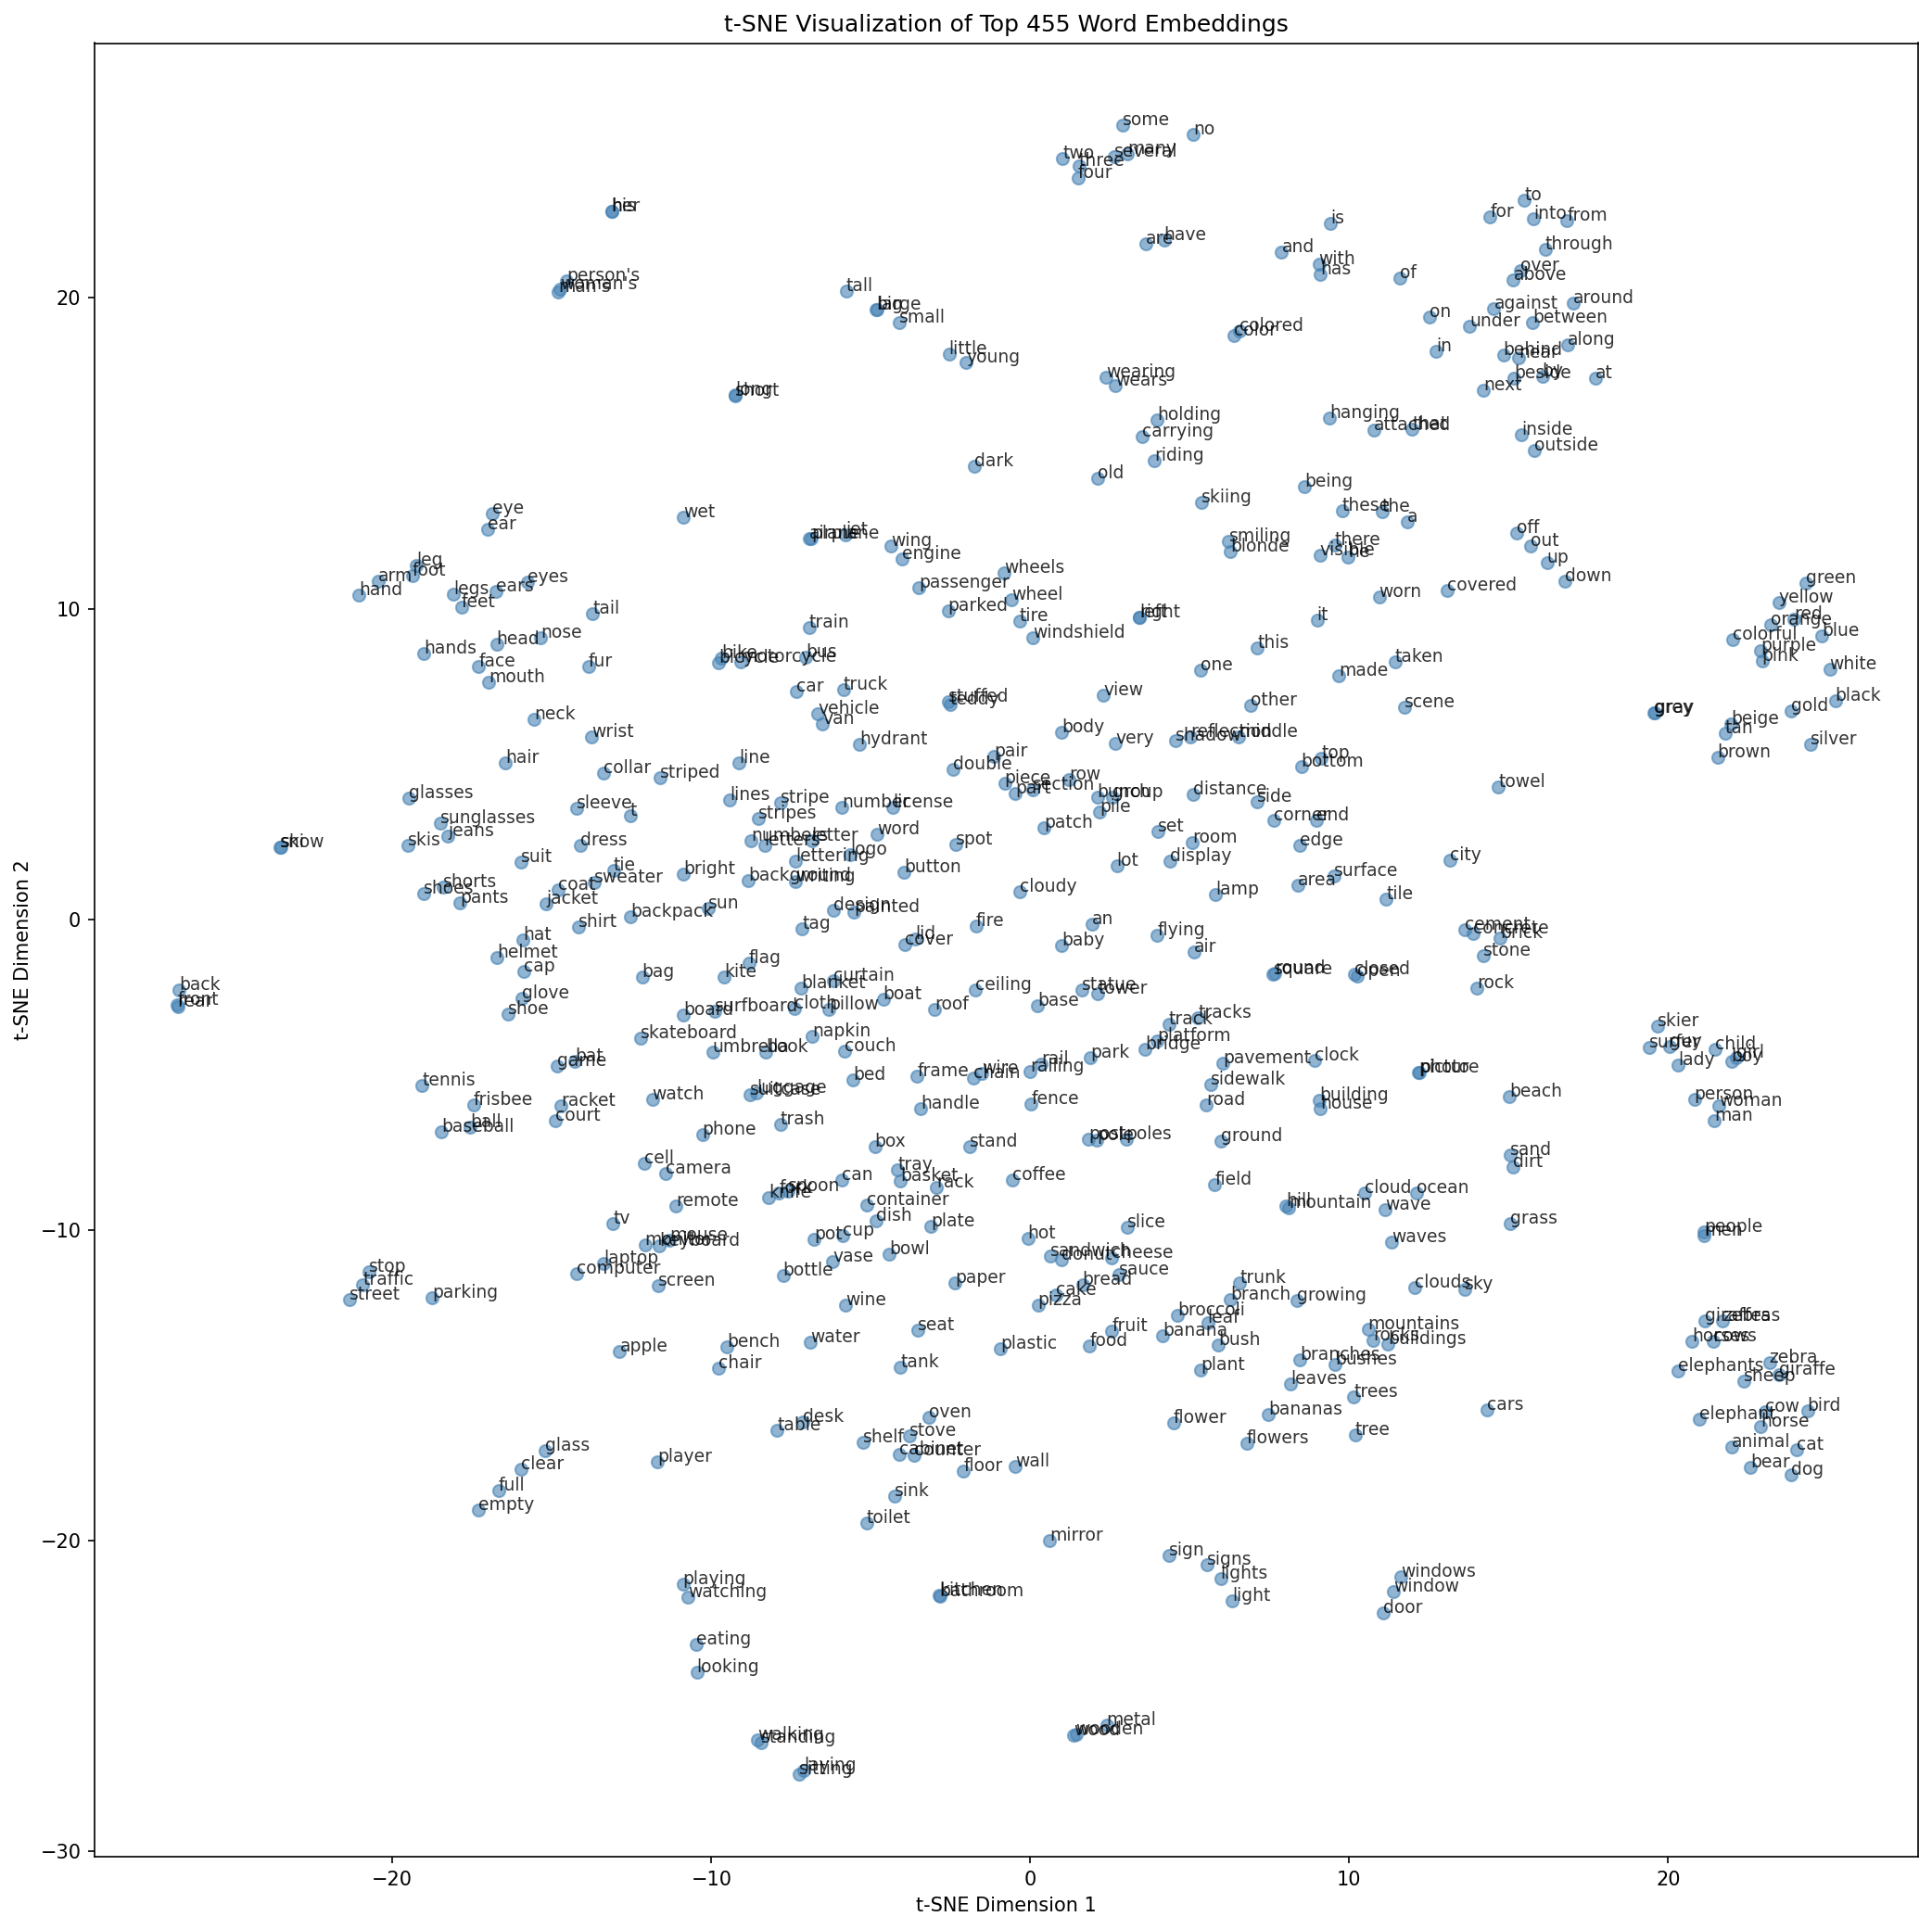

In [ ]:
#NOTE analysing and visualizing embeddings

from lab6 import analyze_embeddings, visualize_embeddings, SkipGramModel
import torch
import os
import numpy as np
from IPython.display import Image, display

# --- 1. Load Best Model ---
# We load the model, nodes, and embeddings saved by train_embeddings
model_path = 'best_model.pth'
if os.path.exists(model_path):
    print(f"Loading best model from {model_path}...")
    checkpoint = torch.load(model_path)
    nodes = checkpoint['nodes']

    # Reconstruct model to get final (non-detached) embeddings
    # Note: We use .get_embeddings() which returns the center_embeddings
    model = SkipGramModel(checkpoint['vocab_size'], checkpoint['embedding_dim'])
    model.load_state_dict(checkpoint['model_state_dict'])
    embeddings = model.get_embeddings()

    print(f"✅ Loaded embeddings for {len(nodes):,} words")
else:
    print("❌ Error: No saved model found!")
    print("Please run the training cell above before proceeding.")
    # Raise an error to stop execution if the model is missing
    raise FileNotFoundError(f"{model_path} not found. Please train the model first.")

# --- 2. Qualitative Analysis ---
# Now we use the helper functions to probe what the model learned.
# We'll check for nearest neighbors (semantics) and analogies (linear structure).
analyze_embeddings(
    nodes=nodes,
    embeddings=embeddings,

    # --- Nearest neighbors ---
    # Probe visual semantics, attributes, and compositional structure
    similarity_examples=[
        # People and roles
        "man", "woman", "child", "boy", "girl", "person",
        # Scene elements
        "tree", "building", "sky", "street", "car", "table",
        # Colors and materials
        "red", "blue", "green", "black", "white", "wooden", "metal",
        # Actions
        "walking", "sitting", "holding", "riding", "standing",
        # Textures / objects
        "water", "grass", "sand", "snow", "wall"
    ],

    # --- Analogies ---
    # a : b :: c : ?
    #  → test if embedding geometry captures color, role, size, material, and action relations
    analogy_examples=[
        # Color analogies
        ("red", "apple", "yellow"),        # → banana?
        ("blue", "sky", "green"),          # → grass?
        ("white", "snow", "brown"),        # → dirt or wood?

        # Role analogies
        ("man", "woman", "boy"),           # → girl?
        ("boy", "girl", "man"),            # → woman?
        ("person", "hat", "hand"),         # → glove?

        # Size / quantity / attribute analogies
        ("long", "short", "tall"),         # → short?
        ("one", "two", "three"),           # → four?

        # Action and object use
        ("dog", "walking", "cat"),         # → sitting?
        ("person", "riding", "boat"),      # → sitting or water?
        ("pizza", "eating", "umbrella"),   # → holding?

        # Material / context
        ("metal", "car", "wooden"),        # → table?
        ("water", "boat", "road"),         # → car?
    ],

    # --- Semantic clusters ---
    # seeds chosen to reveal structure in scene-object relationships
    cluster_seeds=[
        "red", "blue", "green",          # color cluster
        "man", "woman", "child",         # human cluster
        "dog", "cat", "horse", "bird",   # animal cluster
        "building", "house", "street",   # architecture/scene
        "sky", "clouds", "water", "grass", # natural elements
        "car", "bus", "bicycle", "train" # vehicles
    ]
)

# --- 3. t-SNE Visualization ---
# We'll create a 2D plot of the *most frequent* words
# NOTE: Visualizing all 10k+ words is too slow and unreadable.
# The function defaults to the top 200, we'll use 300.
print("\n" + "="*80)
print("VISUALIZING EMBEDDINGS")
print("="*80)
print("Generating t-SNE plot for the top 300 words...")
print("(This may take a moment...)")

tsne_file = "embeddings_tsne.png"
visualize_embeddings(
    nodes,
    embeddings,
    output_file=tsne_file,
    sample_size=len(nodes),
    annotate=True
)

# Display the generated plot
if os.path.exists(tsne_file):
    print(f"\n📈 Displaying t-SNE visualization from {tsne_file}:")
    display(Image(filename=tsne_file, width=800))
else:
    print(f"\n(Plot file {tsne_file} not found.)")

In [ ]:
# NOTE running tests


from lab6 import run_tests

print("="*80)
print("🧪 RUNNING UNIT TESTS")
print("="*80)
print("This will test your implementations of SkipGramDataset and SkipGramModel.")
print("It's crucial that you test your implementations in this lab.")

# This function will run all tests defined in the lab6.py file
# Look for an "OK" or "PASSED" summary at the end.
success = run_tests()

print("\n" + "="*80)
if success:
    print("✅ All tests passed! You are ready to move on to the next step.")
else:
    print("❌ Some tests failed. Please review the errors above and fix your code.")
print("="*80)

test_contexts_built (lab6.TestSkipGramDataset)
Test that contexts are built correctly. ... ok
test_getitem_returns_triplet (lab6.TestSkipGramDataset)
Test that __getitem__ returns correct format. ... ok
test_pairs_generated (lab6.TestSkipGramDataset)
Test that pairs are generated. ... ok
test_embeddings_initialized (lab6.TestSkipGramModel)
Test that embeddings are initialized. ... ok
test_forward_returns_loss (lab6.TestSkipGramModel)
Test that forward pass returns loss. ... ok
test_get_embeddings_returns_numpy (lab6.TestSkipGramModel)
Test that get_embeddings returns numpy array. ... ok
test_dataset_model_compatibility (lab6.TestIntegration)
Test that dataset output works with model input. ... 

🧪 RUNNING UNIT TESTS
This will test your implementations of SkipGramDataset and SkipGramModel.
It's crucial that you test your implementations in this lab.
RUNNING SKIP-GRAM UNIT TESTS

✅ ALL TESTS PASSED!
Total tests run: 7

✅ All tests passed! You are ready to move on to the next step.


ok

----------------------------------------------------------------------
Ran 7 tests in 0.006s

OK
